<div style="border:solid purple 5px; padding: 20px"> 

<b>Здравствуй, Денис!</b>
    
Меня зовут Даша Абраменкова и я буду проверять твой проект 🐍. Если не против, то давай общаться на "ты", но если это не удобно, то обязательно дай знать. Как и в случае, если некомфортно обращение по имени — просто дай знать и все переиграем 😃 
    
Моя задача в первую и единственную очередь — помочь тебе погрузиться в работу с данными и лучше разобраться в предметной области, а совсем не поиск ошибок в домашнем задании (хотя иногда может выглядеть именно так).
<hr>    
Для упрощения коммуникации мои пометки будут в отдельных Markdown ячейках. <b>Пожалуйста, не удаляй и не меняй их</b> — так будет проще отслеживать внесенные изменения. К слову о доработках. Будет намного удобнее, если о сделанных изменениях ты так же сообщишь мне в отдельной Markdown ячейке (это позволит принять проект куда быстрее). 
    
<hr>    
Несколько  слов об оформлении. Мои комментарии будут оформлены тремя цветами:

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера</b>   — зеленый комментарий означает, что эта часть работы выполнена отлично;</div>
    
<div class="alert alert-warning">
<b>🕵️‍♀️  Комментарий ревьюера </b> — желтый цвет укажет на хорошо проделанную работу и предложит (хоть это и необязательно) немного доработать текущий этап проекта;</div>
    
<div class="alert alert-danger">
<b> 👨‍🚒  Комментарий ревьюера</b> — красный комментарий означает, что некоторые аспекты придется изменить, так как без их исправления работу принять я не смогу.</div> 
    
    
<div class="alert alert-info">
<b>🧑‍🎓 Комментарий студента </b> — если хочешь, то можешь использовать синий цвет для своих комментариев, скопировав разметку из этой ячейки</div>    


</div>      

# Вявление закономерностей определяющих успешность игры.

## Общая информация о задаче и входных данных

Анализ проводится в интересах интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.

**Задача проекта**: Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год.

**Входные данные**: В проекте использованы данные из открытых источников: данные о игр, продажи по регионам мира, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные собраны по 2016 год.

`Примечание:
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».`

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
Хорошо оформленное введение — львиная доля успеха 🦁 </div>

## Обзор данных

### Загрузка данных
Данные предоставлены в виде csv файлов, произведем их загрузку.

In [1]:
# ячейка для подключения необходимых библиотек и базовых настроек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from scipy import stats as st
pd.set_option("display.max_columns", None)

In [2]:
# загрузка файла и вывод предварительной информации
games = pd.read_csv('/datasets/games.csv')

### Предварительный осмотр данных
- Посмотрим первые 5 строк таблицы,
- Основные статистики количественных переменных,
- Сводную информацию от таблице.

In [3]:
display(games.head())
display(games.describe())
print(games.info())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Данные предоставлены в 10 столбцах:
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные в таблице предоставлены типами float64, object.

Присутствуют пропуски в данных, особенно выделяются столбцы: `Critic_Score`, `User_Score`, `Rating`.

Статистики по количественным переменным выглядят довольно разрозненно, сильно отличаются минимумы, максимумы, медианы, похоже сказываются разные годы выпуска и развитость рынка игровой индустрии.

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
Еще только обзорное знакомство, а мне уже импонируют выводы 👍</div>

## Предобработка данных

### Исправление стиля заголовков
Привдём все названия столбцов к нижнему регистру.

In [4]:
# games.columns = list(games.columns.str.lower())

games.columns = games.columns.str.lower()

<div class="alert alert-warning">
<b>🕵️‍♀️  Комментарий ревьюера </b>


Оборачивать всю конструкцию в list не было необходимости :)
    </div>

<div class="alert alert-info">
<b>🧑‍🎓 Комментарий студента </b>
    
Списибо за указание, исправил. Первоначальный код закоментировал.
</div>  

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера (v. 2)
    </b>  
    
🙌 </div>

In [5]:
print('Список названий столбцов в таблице:', games.columns.values)

Список названий столбцов в таблице: ['name' 'platform' 'year_of_release' 'genre' 'na_sales' 'eu_sales'
 'jp_sales' 'other_sales' 'critic_score' 'user_score' 'rating']


### Преобразование типов данных
Преобразуем тип данных для столбцов: `year_of_release`, `critic_score`, `user_score`.

Столбец `year_of_release` содержит значения 'NaN'.

In [6]:
print('Число строк со значением "NaN" в столбце "year_of_release":', games.year_of_release.isna().sum())
print('Минимальное значение в столбце "year_of_release":', games.year_of_release.min())

Число строк со значением "NaN" в столбце "year_of_release": 269
Минимальное значение в столбце "year_of_release": 1980.0


Так как задача проекта произвести прогноз по продажам на следующий год, то для нас важно знать год выхода игры, таких значений в таблице не много 269, удалим их. И после этого приведём столбец к типу int.

In [7]:
games = games.dropna(subset=['year_of_release'])
games.year_of_release = games.year_of_release.astype('int')

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
И удаляемые данные оценил, а обоснование для решения дал хорошее


![](https://i.gifer.com/XwkA.gif)</div>

Столбец `critic_score` содержит значения со значением 'NaN', посмотрим их количество.

In [8]:
print('Число строк со значением "NaN" в столбце "critic_score":', games.critic_score.isna().sum())

Число строк со значением "NaN" в столбце "critic_score": 8463


Около половины строк в таблице имеют значение 'NaN' в столбце `critic_score`, удалять их нельзя, заменять также не целесообразно. Поэтому оставим для столбца тип данных float.

Посмотрим на оригинальны значения столбца `user_score`.

In [9]:
print('Уникальные значения столбца "user_score":', games.user_score.unique())

Уникальные значения столбца "user_score": ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [10]:
print('Число строк со значением "NaN" в столбце "user_score":', games.user_score.isna().sum())
print('Число строк со значением "tbd" в столбце "user_score":', games.user_score.where(games.user_score == 'tbd').count())

Число строк со значением "NaN" в столбце "user_score": 6607
Число строк со значением "tbd" в столбце "user_score": 2376


Около половины строк в таблице имеют значение 'NaN' и "tbd" в столбце `user_score`, удалять их нельзя, заменим значение "tbd" на "NaN". И приведём столбец к типу данных float.

In [11]:
games.user_score = games.user_score.where(games.user_score != 'tbd', np.nan)
games.user_score = pd.to_numeric(games.user_score)

Преобразование типов данных завершено.

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
Все принятые решения на этом этапе обработки данных — правильные. И аргументация сильная.</div>

### Обработка пропусков в данных

#### Пропуски в столбце `year_of_release`
Строки с пропусками в столбце `year_of_release` были удалены на этапе преобразования типов данных, как не несущие практической ценности.

#### Пропуски в столбце `name`
Посмотрим на строки в которых присутствует пропуск в столбце `name`.

In [12]:
games[games.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Удалим данные строки, так как их немного и значимой информации в них нет.

In [13]:
games = games.dropna(subset=['name'])

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
И здесь все так :)</div>

#### Пропуски в столбцах: `critic_score`, `user_score`, `rating`.
Выведем ещё раз сводную информацию о таблице, чтобы посмотреть в каких ещё столбцах остались пропуски.

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Остались пропуски в столбцах: `critic_score`, `user_score`, `rating`. 

Пропуски в  столбцах: `critic_score`, `user_score`  оставим со значениме "NaN", так как у нас нет данных по оценкам для этих игр, а заполнение их средним или медианным значением может привести к искажению в исследовании.

Пропуски в  столбце `rating` заменим на значение "Not rating".

In [15]:
games.rating = games.rating.fillna('Not rating')

Обработка пропусков завершена.

<div class="alert alert-danger">
<b> 👨‍🚒  Комментарий ревьюера</b> 
    
С количественными атрибутами желание оставить пропуски полностью поддерживаю — библиотеки с легкостью их исключают из математических расчетов и игнорируют на графиках. Впрочем из первой мысли как раз следует очевидная проблема с категориальными атрибутами, каким является возрастной рейтинг. Так как библиотеки игнорируют значение пропуска, то и из анализа такие игры на определенном этапе выпадут. Но, в отличии от оценок, отсутствие рейтинга, также информативно, как и его наличие.  

    
В случаях, подобных этому, когда пропуск значит именно отсутствие чего-то, а результаты этого чего-то потом мы будем использовать в расчетах, лучшим решением будет оставить все так как есть. Потому что пандас умеет не обращать внимание в расчетах на пропущенные значения, но совершенно точно не умеет отличать "приблизительные" от реальных.
    
    
Представь, что у тебя есть датасет про трех человек и их образ жизни. Где куреню посвящен лишь один столбец. Про Петра мы знаем, что он "курит более 2 пачек в день", Инга "курит по 1 пачке в день", Сергей "курит менее 1 пачки в день", а у Леонида в категориальном атрибуте "кол-во пачек в день" стоит пропуск. Насколько корректно будет игнорировать Лёню или надо сразу определить его, как "некурящего"? :)
</div>

<div class="alert alert-info">
<b>🧑‍🎓 Комментарий студента </b>
    
Списибо за указание на ошибку, исправил. Пропуски заменил на `Not rating`
</div>  

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера (v. 2)
    </b>  
    
🙌 </div>

### Приведение размерности оценок критиков и пользователей к общему масштабу 0-100
Приведём оценку полльзователей к масштабу 0-100, домножим столбец `user_score` на 10.

In [16]:
games['user_score'] = games['user_score'] * 10

### Создание столбца сумарной продажей по всем регионам для каждой игры
Создадим столбец `all_sales` в котором запишем сумму продаж по всем регионам, и выведем первые две строки таблицы.

In [17]:
games['all_sales'] = games.na_sales + games.eu_sales + games.jp_sales + games.other_sales

In [18]:
games.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Not rating,40.24


Столбец `all_sales` создан.

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
Впереди самое интересное 🚀</div>

## Исследовательский анализ данных

### Количество игр выпускавшихся в разные годы
Посмотрим на распределение количества выпущеных игр по годам.

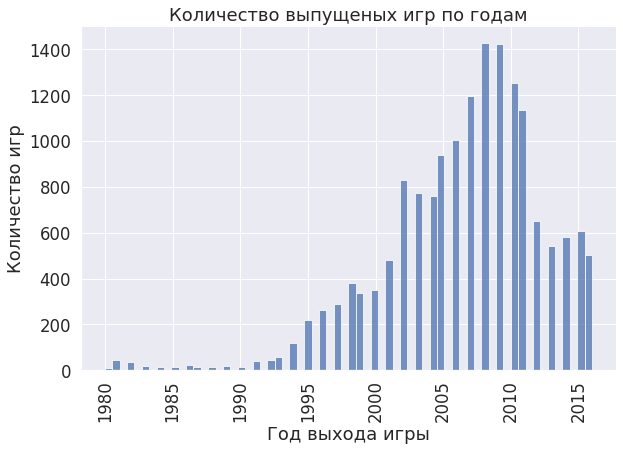

In [19]:
sns.set_theme(font_scale=1.5)
sns.displot(data=games, x="year_of_release", height=6, aspect=1.5).set(title='Количество выпущеных игр по годам', xlabel='Год выхода игры', ylabel='Количество игр')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
Красивый визуал</div>

В распределении наблюдается три больших периода:
1. `1980 - 1993` в данный период объём выпуска игр незначителен и практически не меняется,
2. `1994 - 2008` продолжительный рост объёма выпуска игр,
3. `2009 - 2017` падение количества выпуска игр до уровня около 600 в год.

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
И вывод красивый (и корректный)

![](https://i.gifer.com/6bG0.gif)
</div>

### Анализ продаж по платформам

Посмотрим на общее количество продаж для каждой платформы.

In [20]:
# all_sales_platform - отсортированная таблица общих продаж для каждой платформы
all_sales_platform = games.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales',ascending=False)
print('\nСводная таблица количества продаж по всем платформам:')
display(all_sales_platform.T)


Сводная таблица количества продаж по всем платформам:


platform,PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS,PC,GB,XB,NES,N64,SNES,GC,XOne,2600,WiiU,PSV,SAT,GEN,DC,SCD,NG,WS,TG16,3DO,GG,PCFX
all_sales,1233.56,961.24,931.34,891.18,802.78,727.58,314.14,312.88,289.53,257.81,255.76,254.43,251.57,251.05,218.01,200.04,196.73,159.32,86.48,82.19,53.81,33.59,28.35,15.95,1.86,1.44,1.42,0.16,0.1,0.04,0.03


Посмртрим на распределение количества выпущеных игр по годам, для десяти платформ с наибольшим общим объёмом продаж за всю историю наблюдений.

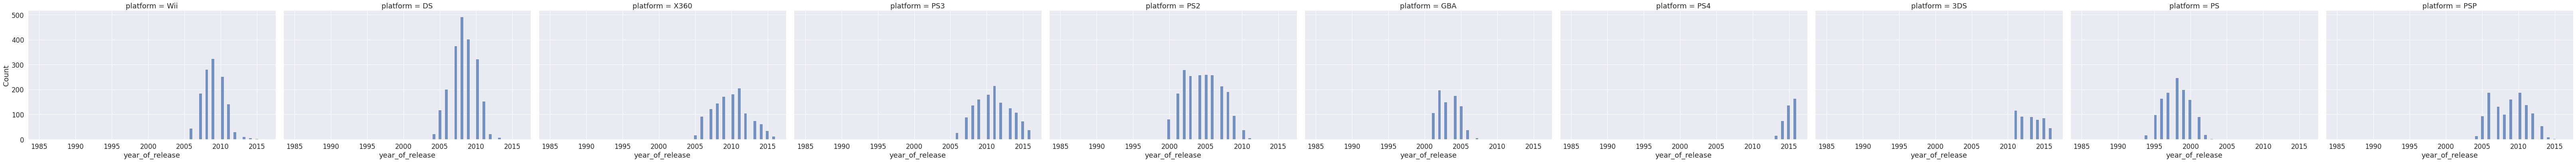

In [21]:
sns.set_theme(font_scale=1.5)
sns.displot(data=games.query('platform in @all_sales_platform.head(10).index'), x="year_of_release", col="platform", height=6, aspect=1.5)
plt.show()

Для удобного чтения графиков, разверните их в полном масштабе, произведя двойной клик по полю с графиками.

Как видно по основным платформам, средний цикл "жизни" для платформы составляет около 10 лет, при этом объём выпуска игр имеет близкое к нормальному распределению.

Из 10 наиболее массовых платформ за всю историю, продолжают развиваться только те платформы, старт которых произошёл начиная с 2010 года.

<div class="alert alert-warning">
<b>🕵️‍♀️  Комментарий ревьюера </b>


Видно, конечно, не очень, но с выводом согласна :)
    </div>

<div class="alert alert-info">
<b>🧑‍🎓 Комментарий студента </b>
    
Согласен с замечанием, для человека не знакомого со средой "Jupyter Notebook" (а такая ситуация вполне возможна), может быть непонятно, как посмотреть графики в заданном масштабе `height=6`. 
    
Добавил комментарий в ячейке `Markdown`, с пояснением как отобразить график в убодном масштабе.
    
Можно конечно отрисовать графики по отдельности в цикле, но так мне кажется лаконичнее.
</div>  

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера (v. 2)
    </b>  
    
Если отрисовывать в цикле, то так можно подкупить ревьюера — они любят функции и циклы :)</div>

### Определение актуального периода в целях исследования

Как было выявлено ранее нас не интересуют платформы, которые несмотря на свою массовость в прошлом уже не актуальны в современный период. Выберем для анализа период начиная с 2010 года, который охватывает как платформы уходящие с рынка, но ещё влияющие на него, так и новые платформы ещё не успевшие выйти в массовый рынок, но находящиеся на подъёме.

Создадим таблицу `games_actual` включающую актуальный период. 

In [22]:
games_actual = games[games.year_of_release >=2010].reset_index(drop=True)
print(f'\nКоличество игр выпущеных начиная с 2010 года: {games_actual.name.count()} шт.')


Количество игр выпущеных начиная с 2010 года: 5277 шт.


<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
Датасет, конечно, заметно похудеет, но нас интересует только будущее — далекое прошлое пусть остается в прошлом)
</div>

### Определение потенциально прибыльных платформ


Посмотрим на общее количество продаж для каждой платформы для актуального периода (начиная с 2010 года).

In [23]:
# all_sales_platform_actual - отсортированная таблица общих продаж для каждой платформы
all_sales_platform_actual = games_actual.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales',ascending=False)
print('\nСводная таблица количества продаж по всем платформам начиная с 2010 года:')
display(all_sales_platform_actual.T)


Сводная таблица количества продаж по всем платформам начиная с 2010 года:


platform,PS3,X360,PS4,3DS,Wii,XOne,DS,PC,WiiU,PSP,PSV,PS2
all_sales,587.74,550.41,314.14,257.81,222.97,159.32,123.75,121.96,82.19,64.05,53.81,6.09


Посмртрим на распределение количества выпущеных игр по годам, для платформ, согласно актуалной таблицы.

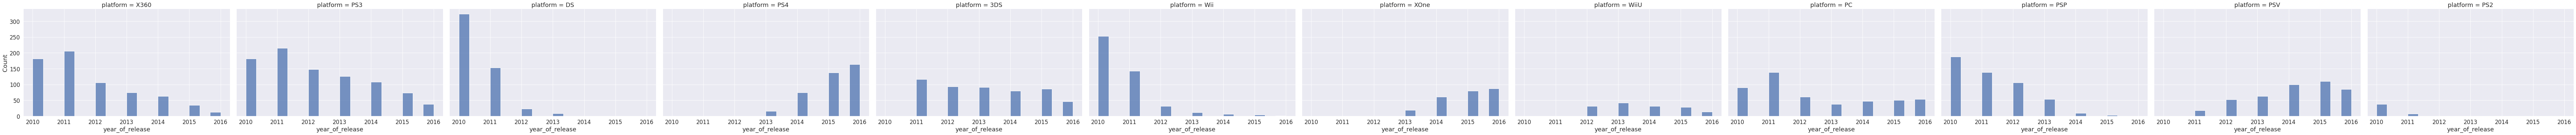

In [24]:
sns.set_theme(font_scale=1.5)
sns.displot(data=games_actual.query('platform in @all_sales_platform_actual.index'), x="year_of_release", col="platform", height=6, aspect=1.5)
plt.show()

Для удобного чтения графиков, разверните их в полном масштабе, произведя двойной клик по полю с графиками.

<div class="alert alert-warning">
<b>🕵️‍♀️  Комментарий ревьюера </b>

Нет, действительно ничего на графиках не видно на обычном ноутбуке с 13 дюймами экрана :) Понятно, что можно увеличить, но все же
    </div>

<div class="alert alert-info">
<b>🧑‍🎓 Комментарий студента </b>

Добавил комментарий в ячейке `Markdown`, с пояснением как отобразить график в убодном масштабе.
    
Если посчитаете, это критичным замечанием дайте знать, сделаю циклом.
</div> 

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера (v. 2)
    </b>  
    
Спасибо :)   </div>

1. Несмотря на свои лидирующие значения по продажам платформы: "X360" и "PS3" находятся на значительном спаде и вероятно уже не будут влиять на рынок.
2. Платформы уже не выпускающие игр: "DS", "Wii", "PSP", "PS2".
3. Платформа не получившая большой доли рынка и также идущая на спад: "WiiU".
4. Платформа имеющая постоянную долю на рынке и способная периодически показывать значительные результаты: "PC".
5. Платформы начавшие спад, но ещё имеющие значительную долю на рынке: "PSV", "3DS".
6. Перспективные платформы, находящиеся на стадии подъёма: "PS4", "XOne".

**Исходя из текущего анализа наиболее предпочтительными платформами являются: "PS4", "XOne", также стоит обратить внимание на платформы: "РС", "PSV", "3DS".**

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
А вывод снова хороший 
    
ЗЫ: нравится твое форматирование 👌
</div>

Построим график "ящик с усами" по глобальным продажам для перспективных платфрм. На котором отобразим количесвто продаж для каждой игры.

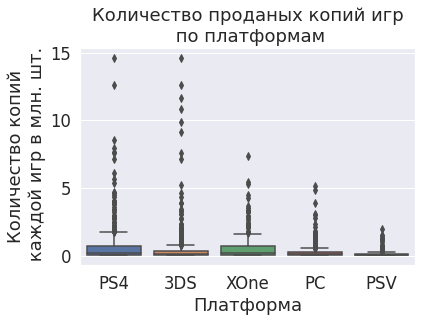

In [25]:
sns.boxplot(x="platform", y="all_sales", data=games_actual.query('platform in ["PS4", "XOne", "PC", "PSV", "3DS"]')).set(title='Количество проданых копий игр\n по платформам', xlabel='Платформа', ylabel='Количество копий\n каждой игр в млн. шт.')
plt.show()

Как видно у всех платформ имеются значительные по размеру выбросы, сильно отличные от медианных значений, которые практически не просматриваются на фоне выбросов.

Выбросами являются игры, которые имеют наибольшую популярность на своей платформе, являющиеся так сказать "флагманами", похоже у этих игр должны быть хорошие отзывы как со стороны критиков, так и со стороны пользователей.

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
График, конечно красивый
</div>

<div class="alert alert-warning">
<b>🕵️‍♀️  Комментарий ревьюера </b>

Но вот значения на нем непонятные
    </div>

<div class="alert alert-info">
<b>🧑‍🎓 Комментарий студента </b>
    
Согласен, что в легенде не указан масштаб.
    
В легенду по оси `y` добавил информацию, что значения указаны в миллионах.

Также в ячейке `markdown` перед построением графика, сделал более чёткие формулировки.
</div> 

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера (v. 2)
    </b>  
    
Я несколько не о том. Очень большая площадь отдана выбросам и не совсем понятно, где находится медиана, а где квартили. Возможно было бы лучше, если ограничение стояло на 5 млн. копий — очевидно, что выше выбросы </div>

### Анализ влияния отзывов пользователей и критиков на продажи игр для платформы PS4
Проанализируем влияние отзывов пользователей и критиков на продажи игр на примере самой перспективной платформы `PS4`. Построим диаграмму рассеяния.

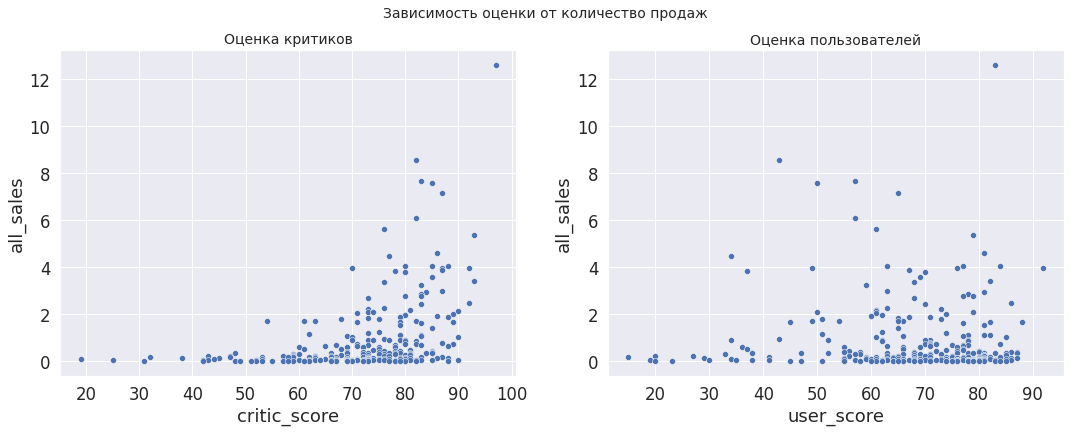

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
fig.suptitle('Зависимость оценки от количество продаж', fontsize=14)
axes[0].set_title('Оценка критиков', fontsize=14)
axes[1].set_title('Оценка пользователей', fontsize=14)
sns.scatterplot(data=games_actual.query('platform == "PS4"'), x="critic_score", y="all_sales", sizes=(1, 8), ax=axes[0])
sns.scatterplot(data=games_actual.query('platform == "PS4"'), x="user_score", y="all_sales", sizes=(1, 8), ax=axes[1])
plt.show()

Как показывает диаграмма рассеяния оценки пользователей практически не влияют на продажи игра (наблюдаются большие продажи для некоторых игр, оценка которых значительно ниже середины).

Оценка же критиков влияние имеет, но оно также не является подавляющим.

Проверим наблюдения посчитав корреляцию Пирсона между отзывами и продажами.

In [27]:
print('\nКоэффициент корреляции Пирсона между продажами и отзывами пользователей для "PS4":', round(games_actual.query('platform == "PS4"').all_sales.corr(games_actual.query('platform == "PS4"').user_score), 2))
print('Коэффициент корреляции Пирсона между продажами и отзывами критиков для "PS4":', round(games_actual.query('platform == "PS4"').all_sales.corr(games_actual.query('platform == "PS4"').critic_score), 2))


Коэффициент корреляции Пирсона между продажами и отзывами пользователей для "PS4": -0.03
Коэффициент корреляции Пирсона между продажами и отзывами критиков для "PS4": 0.41


**Как и предполагали, корреляция между отзывами пользователей и продажами отсутствует. Если и вкладывать в рекламму, то лучше это делать через критиков, хотя и их роль не является определяющей.**

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
Вот прямо шикарно 🙌
</div>

### Соотношение выводов по продажам игр на других платформах
Проверим ссответствует ли наш вывод о влиянии отзывов на продажи для других актуальных платформ, посмотрим на корреляцию Пирсона для них.

In [28]:
for platform in ["XOne", "PC", "PSV", "3DS"]:
    print(f'\nКоэффициент корреляции Пирсона между продажами и отзывами пользователей для {platform}:', round(games_actual.query('platform == @platform').all_sales.corr(games_actual.query('platform == @platform').user_score), 2))
    print(f'Коэффициент корреляции Пирсона между продажами и отзывами критиков для {platform}:', round(games_actual.query('platform == @platform').all_sales.corr(games_actual.query('platform == @platform').critic_score), 2))


Коэффициент корреляции Пирсона между продажами и отзывами пользователей для XOne: -0.07
Коэффициент корреляции Пирсона между продажами и отзывами критиков для XOne: 0.42

Коэффициент корреляции Пирсона между продажами и отзывами пользователей для PC: -0.01
Коэффициент корреляции Пирсона между продажами и отзывами критиков для PC: 0.34

Коэффициент корреляции Пирсона между продажами и отзывами пользователей для PSV: 0.01
Коэффициент корреляции Пирсона между продажами и отзывами критиков для PSV: 0.13

Коэффициент корреляции Пирсона между продажами и отзывами пользователей для 3DS: 0.22
Коэффициент корреляции Пирсона между продажами и отзывами критиков для 3DS: 0.35


Как видно из значения корреляции Пирсона, на других платформах ситуация похожа, влияние отзывов пользователей не имеет значения, за исключением платформы "3DS", где просматривается незначительная зависимость.

Влияние критиков варьируется между платформами от 0.13 до 0.41, критики имеют наибольшее влияние на платформе "XOne".

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
И про циклы не забываешь 
    
    
![](https://i.gifer.com/PN7i.gif)
    
</div>

### Общее распределение игр по жанрам
Посмотрим на распределение количества выпущеных игр по жанрам, начиная с 2010 года.

Построим два расспределения:
- распределение общего количества проданых копий,
- распределение среднего количества проданых копий на одну игру.

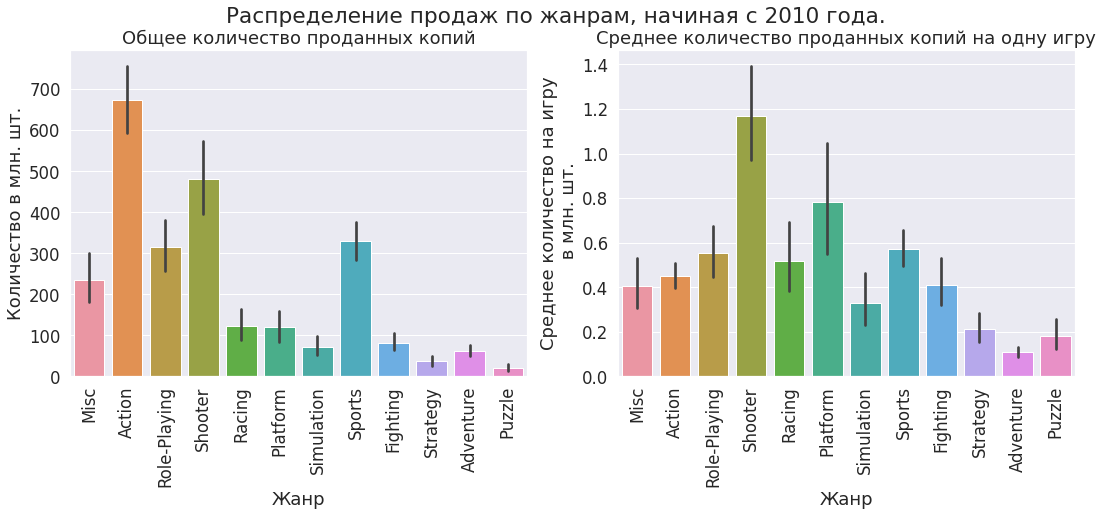

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
fig.suptitle('Распределение продаж по жанрам, начиная с 2010 года.')
axes[0].set_title('Общее количество проданных копий')
axes[1].set_title('Среднее количество проданных копий на одну игру')
sns.barplot(data=games_actual, x="genre", y="all_sales", estimator=np.sum, ax=axes[0]).set_xlabel('Жанр')
axes[0].set_ylabel('Количество в млн. шт.')
plt.setp(axes[0].get_xticklabels(), rotation=90)
sns.barplot(data=games_actual, x="genre", y="all_sales", estimator=np.mean, ax=axes[1]).set_xlabel('Жанр')
axes[1].set_ylabel('Среднее количество на игру\n в млн. шт.')
plt.setp(axes[1].get_xticklabels(), rotation=90)
plt.show()

- Из распределений видно, что с большим отрывом по массовости общего выпуска является жанр "Action", около 670 млн. копий.
- Однако если рассматривать среднюю прибыльность с одной игры, то жанр "Action" занимает лишь 6 место.
- Лидером по средней прибыльности на одну игру является жанр "Shooter", с показателем в районе 1,2 млн. проданных копий.

<div class="alert alert-danger">
<b>👨‍🚒 Комментарий ревьюера </b>

Общие продажи - не лучшая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.  
    
Ты удивишься, если попробуешь взглянуть на данные под другим углом 
    
![](https://media.giphy.com/media/MePp78CYbOaYh3iNBZ/giphy.gif)

</div>
 

<div class="alert alert-info">
<b>🧑‍🎓 Комментарий студента </b>

Спасибо за указание на ошибку.
Допустил оплошность, некорректно вычитал задание, там действительно говорится о прибыльности, а не о количестве выпущеных игр. Хотя для большего формализма, у нас отсутствуют данные о стоимости одной копии для игры, поэтому говорить о прибыли в данном контексте не верно.

Решил для наглядности, оставить график с общими продажами, но добавил рядом график со средними продажами на одну игру. Действительно, есть над чем поразмышлять, ещё раз спасибо за науку. :)  Также изменил выводы под графиком и общий вывод по исследованию.
</div> 

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера (v. 2)
    </b>  
    
Во-первых, ты великолепно работаешь с графикой. Явно думаешь о "зрителе" 👍👍👍

Во-вторых, никогда не бывает лишним посмотреть, описательные статистики: всего пара строчек кода, а данные могут открыться под иным углом</div>

## Вывод по исследовательскому анализу данных

1. Самым перспективным направлением на рынке будут пользоваться игры в жанре "Shuter" на платформах "PS4" и "X360".
2. Также стоит обратить внимание на жанры: "Role-Playing", "Sports", "Racing", "Platform", и платформы: "РС", "PSV", "3DS".
3. Если вкладывать средства в рекламную компанию, то только через критиков, но не стоит ожидать значительной отдачи.

## Портрет пользователя каждого региона

Создадим функцию `ploting_top`, которая будет строить круговые диаграммы для 3-х регионов (Сев.Америка, Европа, Япония). Диаграммы будут строиться в зависимости от значения параметра `chart`:
- `platform` - доли продаж по платформам для регионов,
- `genre` - доли продаж по жанрам для регионов,
- `rating` - доли продаж по регионам в зависимости от рейтинга,
- любое другое значение выдаст ошибку при вызове: 'Неверно указан аргумент, используйте: "platform", "genre", "rating"'.

In [30]:
def ploting_top(chart):
    
    
    if chart == 'platform':
        title = 'Доли продаж по жанрам для регионов'
        count_tail = 5
    elif chart == 'genre':
        title = 'Доли продаж по жанрам для регионов'
        count_tail = 6
    elif chart == 'rating':
        title = 'Доли продаж по регионам в зависимости от рейтинга'
        count_tail = 5
    else:
        raise NameError('Неверно указан аргумент, используйте: "platform", "genre", "rating".')
    
    # создание графической подложки под 3 диаграммы
    fig, axes = plt.subplots(1, 3, figsize=(20,6))
    fig.suptitle(title, fontsize=18)
    
    # Создание свобной таблицы по регионам
    top = []
    for column in ['na_sales', 'eu_sales', 'jp_sales']:
        column = games_actual.pivot_table(index=chart, values=column, aggfunc='sum').sort_values(by=column)[column].tail(count_tail)/games_actual[column].sum()
        if chart != 'rating' or column.name != 'jp_sales':
            top.append(pd.concat([column, pd.Series({'Other': 1-column.tail(count_tail).sum()})]))
        else:
            top.append(pd.concat([column, pd.Series({'Other': 0})]))        
    top = pd.concat([top[0], top[1], top[2]], axis=1, keys=['na_sales', 'eu_sales', 'jp_sales'])

    # объединение строк 'Other' и 'Misc' для столбца `genre`
    if chart == 'genre':
        top.loc['Other'] = top.loc['Misc'] + top.loc['Other']
        top = top.drop(index='Misc')

    # создание диаграм
    top.na_sales.plot(kind='pie', ax=axes[0], title='Северная Америка', ylabel='')
    top.eu_sales.plot(kind='pie', ax=axes[1], title='Европа', ylabel='')
    top.jp_sales.plot(kind='pie', ax=axes[2], title='Япония', ylabel='')
    plt.show()

### Самые популярные платформы (топ-5)
Построим круговые диаграммы долей продаж в Северной Америки, Европы и Японии, для пяти самых популярных платформ за актуальный период. Вызовем ранее созданную функцию `ploting_top`, с аргументом `platform`.

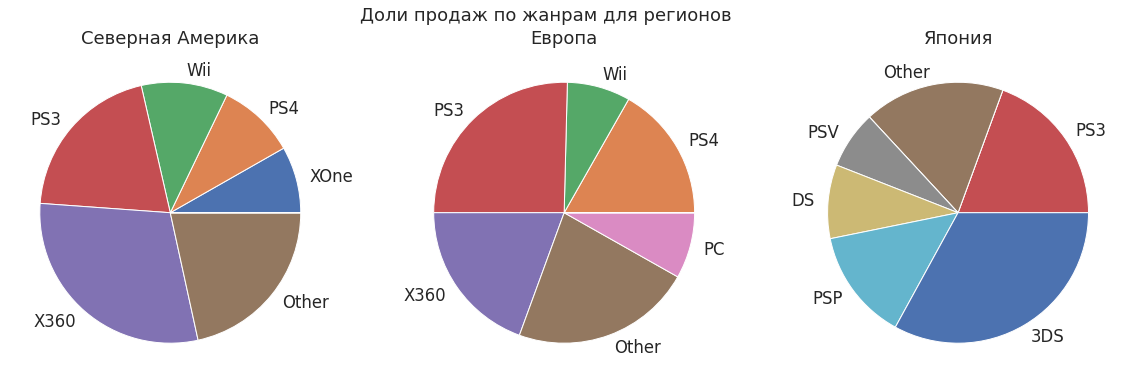

In [31]:
ploting_top('platform')

Как видно рынки Северной Америки и Европы схожи, а вот ранок Японии сильно отличается, там большую долю занимае платформа 3DS.

### Самые популярные жанры (топ-5)
Построим круговые диаграммы долей продаж в Северной Америки, Европы и Японии, для пяти самых популярных жанров за актуальный период. Вызовем ранее созданную функцию `ploting_top`, с аргументом `genre`.

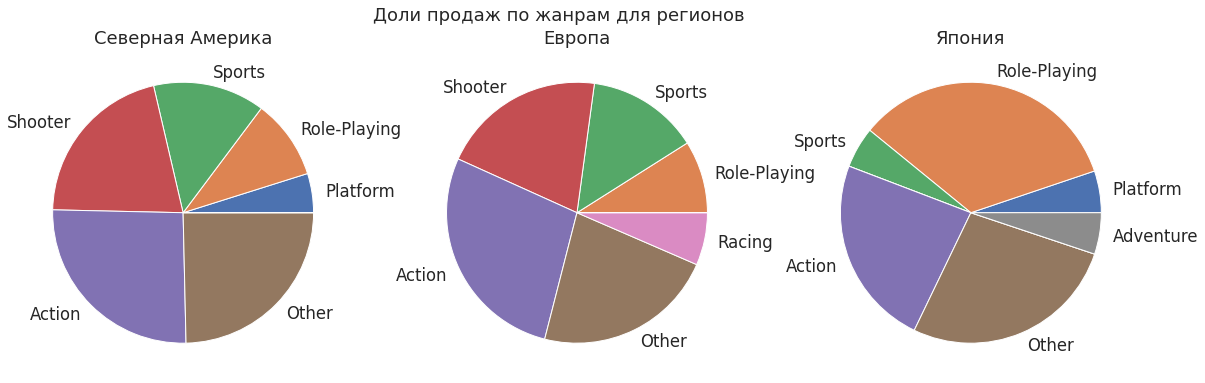

In [32]:
ploting_top('genre')

Как видно рынки Северной Америки и Европы схожи ("Action", "Shooter", "Sports"), а вот ранок Японии сильно отличается, там большую долю занимают ролевые игры.

### Влияние рейтинга ESRB на продажи по регионам

Построим круговые диаграммы долей продаж в Северной Америки, Европы и Японии, в зависимости от рейтинга за актуальный период. Вызовем ранее созданную функцию `ploting_top`, с аргументом `rating`.

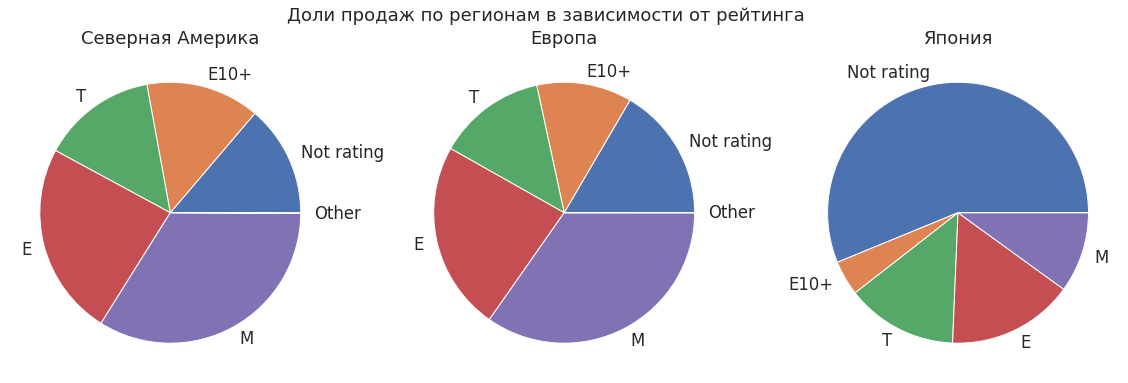

In [33]:
ploting_top('rating')

Как видно рынки Северной Америки и Европы схожи относительно рейтингов, а вот ранок Японии сильно отличается, там более половины рынка занимают игры рейтинг которых не определён.

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
Образцово-показательное составление портрета
    
    
![](https://i.gifer.com/5aF5.gif)
    
</div>

<div class="alert alert-danger">
<b>👨‍🚒 Комментарий ревьюера </b>

Но у нас выпали игры без рейтинга :)

</div>
 

<div class="alert alert-info">
<b>🧑‍🎓 Комментарий студента </b>

Спасибо за указание на ошибку.

После заполнения пропусков в столбце `rating` значением `Not rating`, и небольшой модернизации функции `ploting_top`, ситуация выправилась.
</div> 

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера (v. 2)
    </b>  
    
Рада быть полезной 🙃 </div>

## Проверка гипотез

### Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC
Для проверки гипотез получим выборки пользовательских рейтингов для платформ из актуальной базы данных (начиная с 2010 года).

In [34]:
user_score_xone = games_actual.query('platform == "XOne"').user_score.dropna()
user_score_pc = games_actual.query('platform == "PC"').user_score.dropna()
print(f'Размер выборки пользовательских рейтингов для платформы "XOne": {len(user_score_xone)}, дисперсия выборки: {np.var(user_score_xone):.2f}\n'
      f'Размер выборки пользовательских рейтингов для платформы "PC": {len(user_score_pc)}, дисперсия выборки: {np.var(user_score_pc):.2f}')

Размер выборки пользовательских рейтингов для платформы "XOne": 182, дисперсия выборки: 189.65
Размер выборки пользовательских рейтингов для платформы "PC": 374, дисперсия выборки: 244.39


Для проверки гипотезы применим t-тест, это возможно по следующим причинам:
1. выборки должны быть независимы, это условие выполнено, так как пользователи играют в конкретные игры на тех платформах, которые им предпочтительны (мало вероятно, что пользователь играет в одну игру на разных платформах),
2. выборочные средние распределены нормально, так как размеры наших выборок 182 и 374, что достаточно для выполнения ЦПТ о распределении средних выборок,
3. размеры выборок и дисперсии  у нас различаются, но это можно учесть как аргумент `equal_var = False` при вызове функции `ttest_ind`.

За нулевую гипотезу примем равенство средних пользовательских рейтингов для платформ Xbox One и PC, альтервнативной гипотезой будет их раличие.
Уровень статистической значимости примем за 0.05.

In [35]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвегнем нулевую гипотезу

results = st.ttest_ind(user_score_xone, user_score_pc, equal_var = False)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, p-значение: ', results.pvalue)
else:
    print('Не получилось отвергнуть нулевую гипотезу, p-значение: ', results.pvalue) 

Не получилось отвергнуть нулевую гипотезу, p-значение:  0.9801634129117981


Нулевая гипотеза: "равенство средних пользовательских рейтингов для платформ Xbox One и PC" не отвергнута, это значит что:
**отсутствуют статистически значимые отличия между средними значениями пользовательских рейтингов для платформ Xbox One и PC.**

### Гипотеза об отличии средних пользовательских рейтингов жанров Action и Sports
Для проверки гипотез получим выборки пользовательских рейтингов для жанров из актуальной базы данных (начиная с 2010 года).

In [36]:
user_score_action = games_actual.query('genre == "Action"').user_score.dropna()
user_score_sports = games_actual.query('genre == "Sports"').user_score.dropna()
print(f'Размер выборки пользовательских рейтингов для жанра "Action": {len(user_score_action)}, дисперсия выборки: {np.var(user_score_action):.2f}\n'
      f'Размер выборки пользовательских рейтингов для жанра "Sports": {len(user_score_sports)}, дисперсия выборки: {np.var(user_score_sports):.2f}')

Размер выборки пользовательских рейтингов для жанра "Action": 779, дисперсия выборки: 184.78
Размер выборки пользовательских рейтингов для жанра "Sports": 315, дисперсия выборки: 282.66


Для проверки гипотезы применим t-тест, это возможно по следующим причинам:
1. выборки должны быть независимы, это условие выполнено,
2. выборочные средние распределены нормально, так как размеры наших выборок 779 и 315, что достаточно для выполнения ЦПТ о распределении средних выборок,
3. размеры выборок и дисперсии  у нас различаются, но это можно учесть как аргумент `equal_var = False` при вызове функции `ttest_ind`.

За нулевую гипотезу примем равенство средних пользовательских рейтингов для жанров Action и Sports, альтервнативной гипотезой будет их раличие.
Уровень статистической значимости примем за 0.05.

In [37]:
alpha = .05 # критический уровень статистической значимости, если p-value окажется меньше него - отвегнем нулевую гипотезу

results = st.ttest_ind(user_score_action, user_score_sports, equal_var = False)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу, p-значение: ', results.pvalue)
else:
    print('Не получилось отвергнуть нулевую гипотезу, p-значение: ', results.pvalue) 

Отвергаем нулевую гипотезу, p-значение:  1.451615246784473e-15


Нулевая гипотеза: "равенство средних пользовательских рейтингов для жанров Action и Sports" отвергнута, это значит что принята альтернативная гипотеза:
**Средние пользовательских рейтингов жанров Action и Sports различны.**

<div class="alert alert-success">
<b>🤌 Комментарий ревьюера </b>  
    
Проверка гипотез не самая интуитивно понятная вещь. Но ты с ней справился на "ура!" ✋
    

    
</div>

# Общие выводы

Анализ проведён за период с 2010 года, который охватывает как платформы уходящие с рынка, но ещё влияющие на него, так и новые платформы ещё не успевшие выйти в массовый рынок, но находящиеся на подъёме.

В ходе исследования выявлены следующие закономерности влияющие на рынок видеоигр:
1. Самым перспективным направлением на рынке будут пользоваться игры в жанре "Shuter" на платформах "PS4" и "X360".
2. Также стоит обратить внимание на жанры: "Role-Playing", "Sports", "Racing", "Platform", и платформы: "РС", "PSV", "3DS".
3. Если вкладывать средства в рекламную компанию, то только через критиков, но не стоит ожидать значительной отдачи.
4. Рынки видеоигр Северной Америки и Европы близки по жанрам, игровым платформам и влиянию рейтингов, в то время как рынок Японии сильно отличается по данным параметрам. Не нужно брать во внимание рынок Японии, для оценки спроса на игры.
5. Средние пользовательские рейтинги для Xbox One и PC одинаковые, с уровнем статистической значимости 0.05.
6. Средние пользовательские рейтинги для жанров Action и Sports разные, с уровнем статистической значимости 0.05.

<div class="alert alert-success">
<b> 🤌  Комментарий ревьюера </b>  

Вот это итоговый вывод! Ты не просто рассказал о проделанной работе, но и сделала это так, что бизнесу прямо сразу есть что начать делать. Все рекомендации — все к месту. </div>

<div style="border:solid purple 5px; padding: 20px"> 
Очень хорошая работа! Аккуратный код, красивая визуализация, грамотная работа с результатами. Есть несколько критических моментов, требующий доработки, но думаю, что ты с ними легко справишься ✋
    
Если у тебя будут возникать вопросы или же покажется, что что-то я пропустила при проверке, обязательно дай знать — чем тщательнее на этапе учебы будут разобраны детали, тем проще будет применять эти знания на практике.

С нетерпением жду твои правки 
    
![](https://i.gifer.com/iAe.gif)